# Load the files in Google Colab

1.   List item
2.   List item



In [1]:
# Access to your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Folder path in Google Drive (you can change this to the folder with your dataset)
folder_path = '/content/drive/MyDrive/'

# Read the RNA-seq and clinical data files for LUAD patients
import pandas as pd
df_LUAD_clinical_data = pd.read_csv(folder_path+'Pats_LUAD.csv')
df_LUAD_RNAseq = pd.read_csv(folder_path+'RNAseq_LUAD.csv')

# Data wrangling:
df_LUAD_RNAseq.set_index('Genes', inplace=True)

# Print first columns and rows of the data. (Check data loading and understand )
print('LUAD CLINICAL DATA:')
print(df_LUAD_clinical_data.head())
print('LUAD RNAseq:')
print(df_LUAD_RNAseq.head())

print(df_LUAD_RNAseq.shape)


Mounted at /content/drive
LUAD CLINICAL DATA:
     PATIENT_ID SUBTYPE CANCER_TYPE_ACRONYM  \
0  TCGA-05-4250    LUAD                LUAD   
1  TCGA-05-4395    LUAD                LUAD   
2  TCGA-05-4396    LUAD                LUAD   
3  TCGA-05-4402    LUAD                LUAD   
4  TCGA-05-4415    LUAD                LUAD   

                       OTHER_PATIENT_ID   AGE     SEX  \
0  f98ecd8a-b878-4f53-b911-20cd8e17281c  79.0  Female   
1  762dea8a-5b41-4058-979a-b7876ed13d7e  76.0    Male   
2  9f81c602-8afa-4588-b0b6-6e5a1a128d5a  76.0    Male   
3  722d6818-f1cb-49f4-b68a-fd0a31304681  57.0  Female   
4  d15b7b29-c5c5-41d8-b83b-7cc12fe92820  57.0    Male   

  AJCC_PATHOLOGIC_TUMOR_STAGE AJCC_STAGING_EDITION  DAYS_LAST_FOLLOWUP  \
0                  STAGE IIIA                  6TH                 NaN   
1                  STAGE IIIB                  5TH                 NaN   
2                  STAGE IIIB                  5TH                 NaN   
3                    STAGE IV   

 # Exploratory  Analysis (RNA-seq)

Mean of EGFR: -0.0010997971602434136
Standard Deviation of EGFR: 1.0018235901760806

Mean of KRAS: 0.005386612576064905
Standard Deviation of KRAS: 0.9998187660483092

Mean of MYC: -0.0016933062880324643
Standard Deviation of MYC: 1.007795176542142

Mean of CCND1: -0.0054624746450304285
Standard Deviation of CCND1: 1.0060864430079726

Mean of VEGFA: 0.009089046653144013
Standard Deviation of VEGFA: 1.0011949082524714



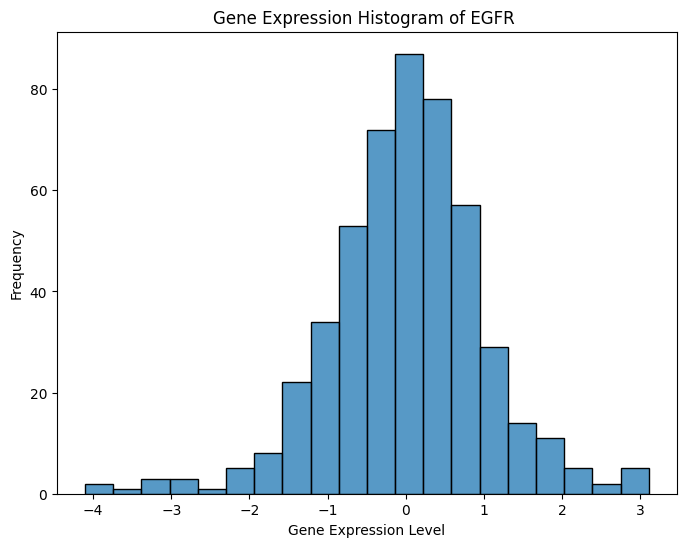

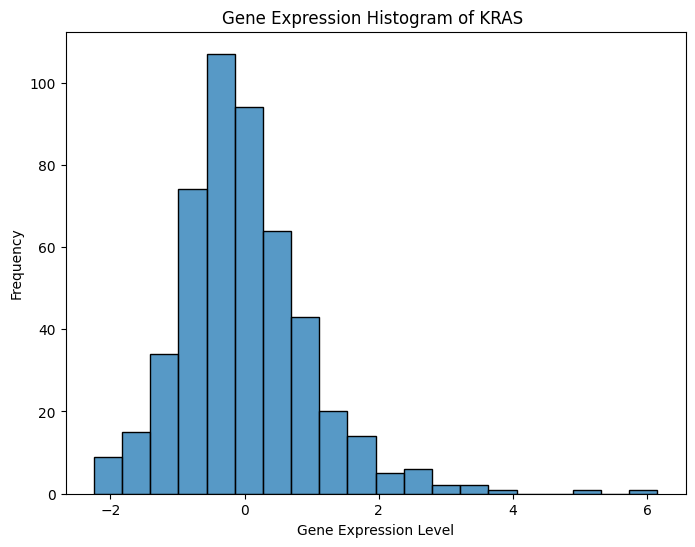

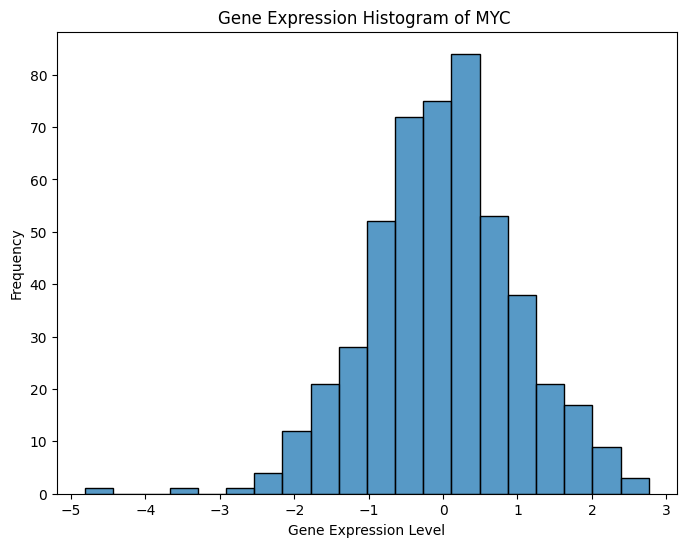

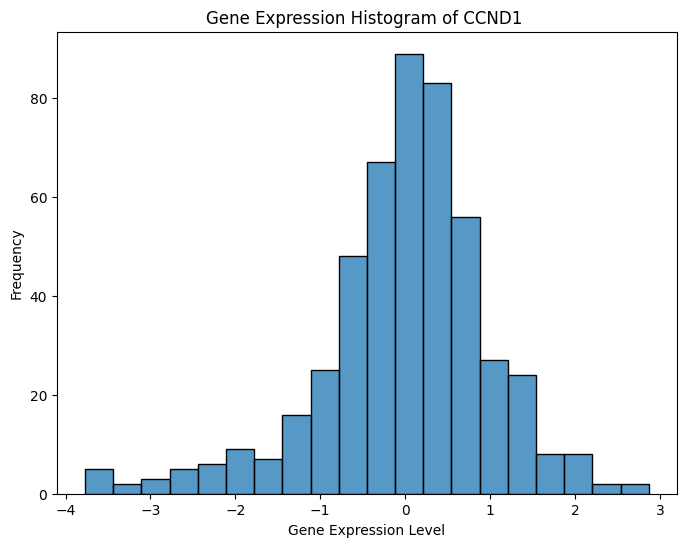

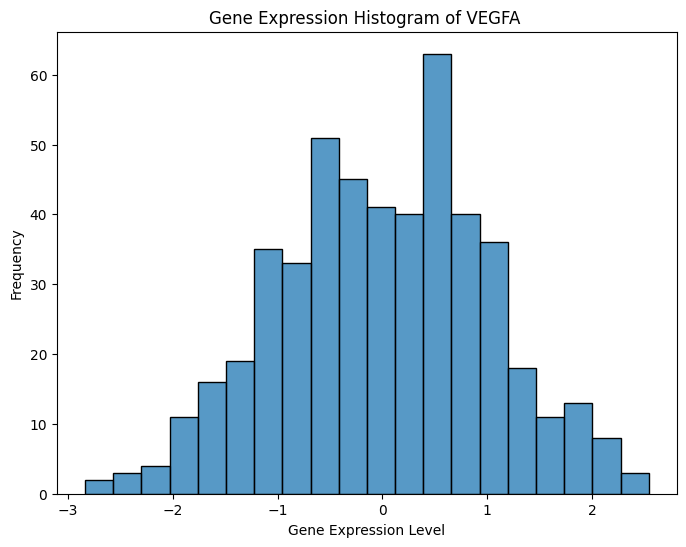

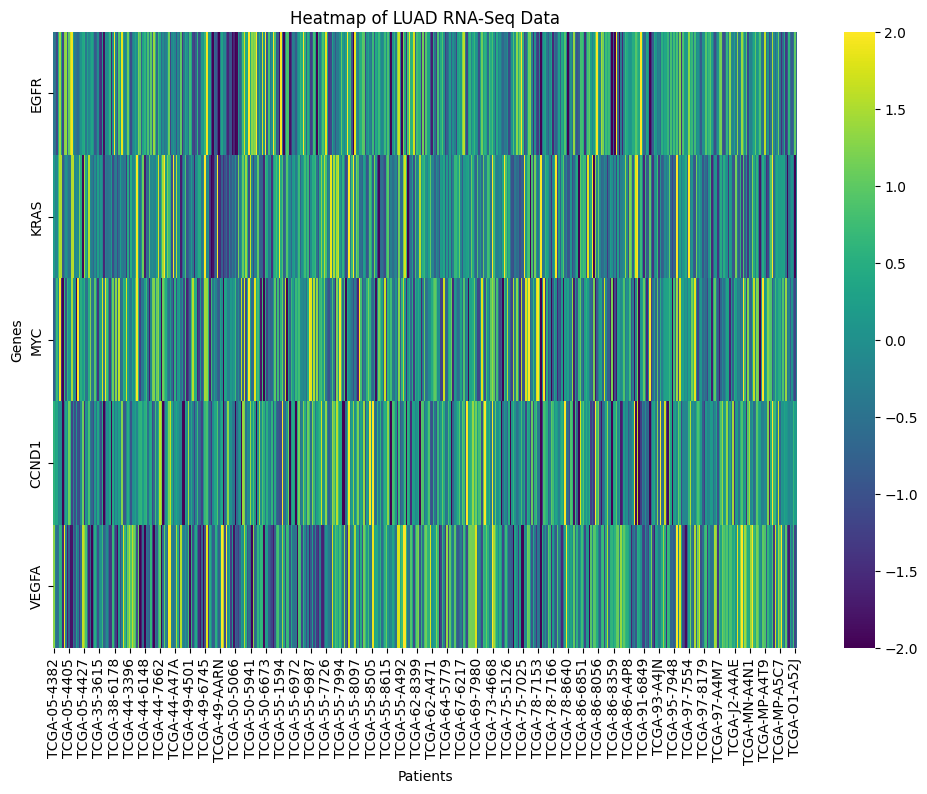

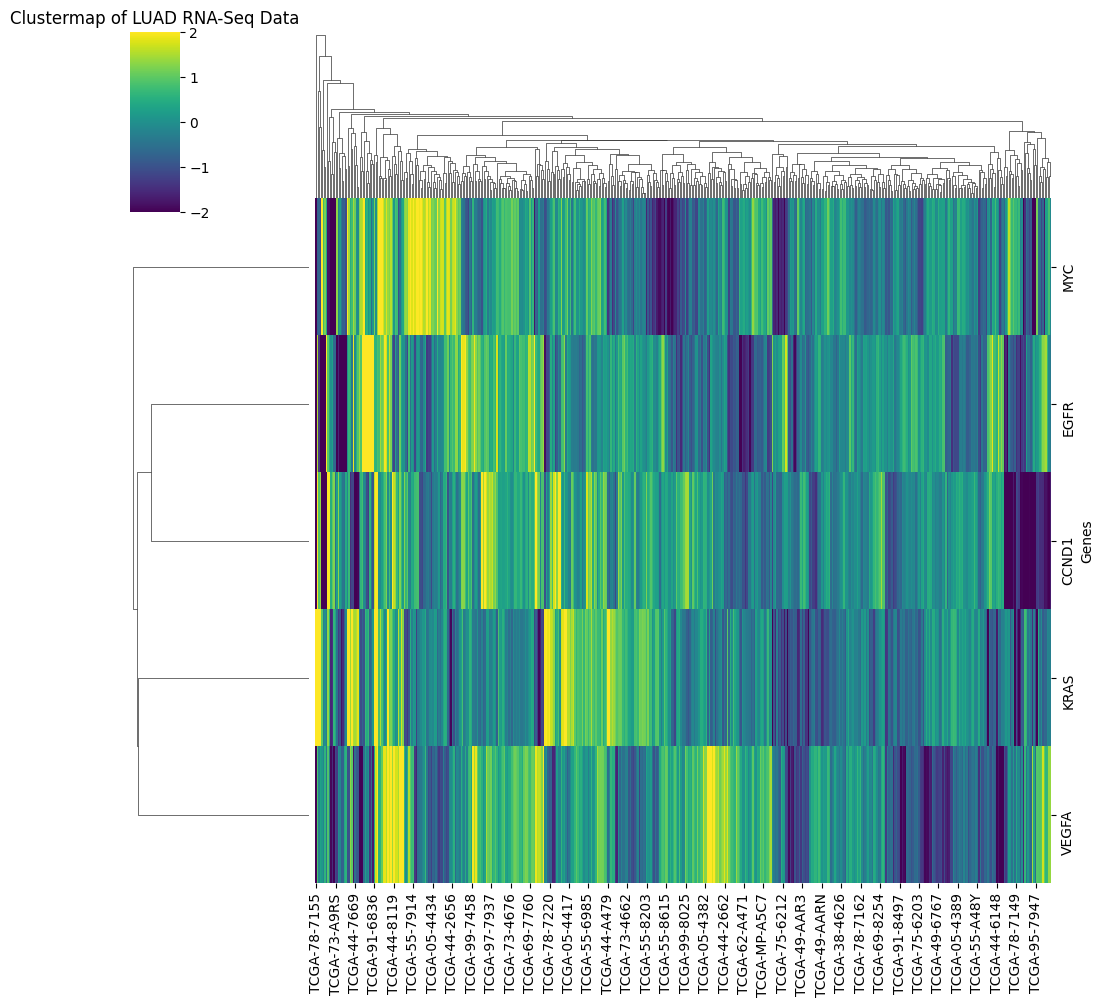

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


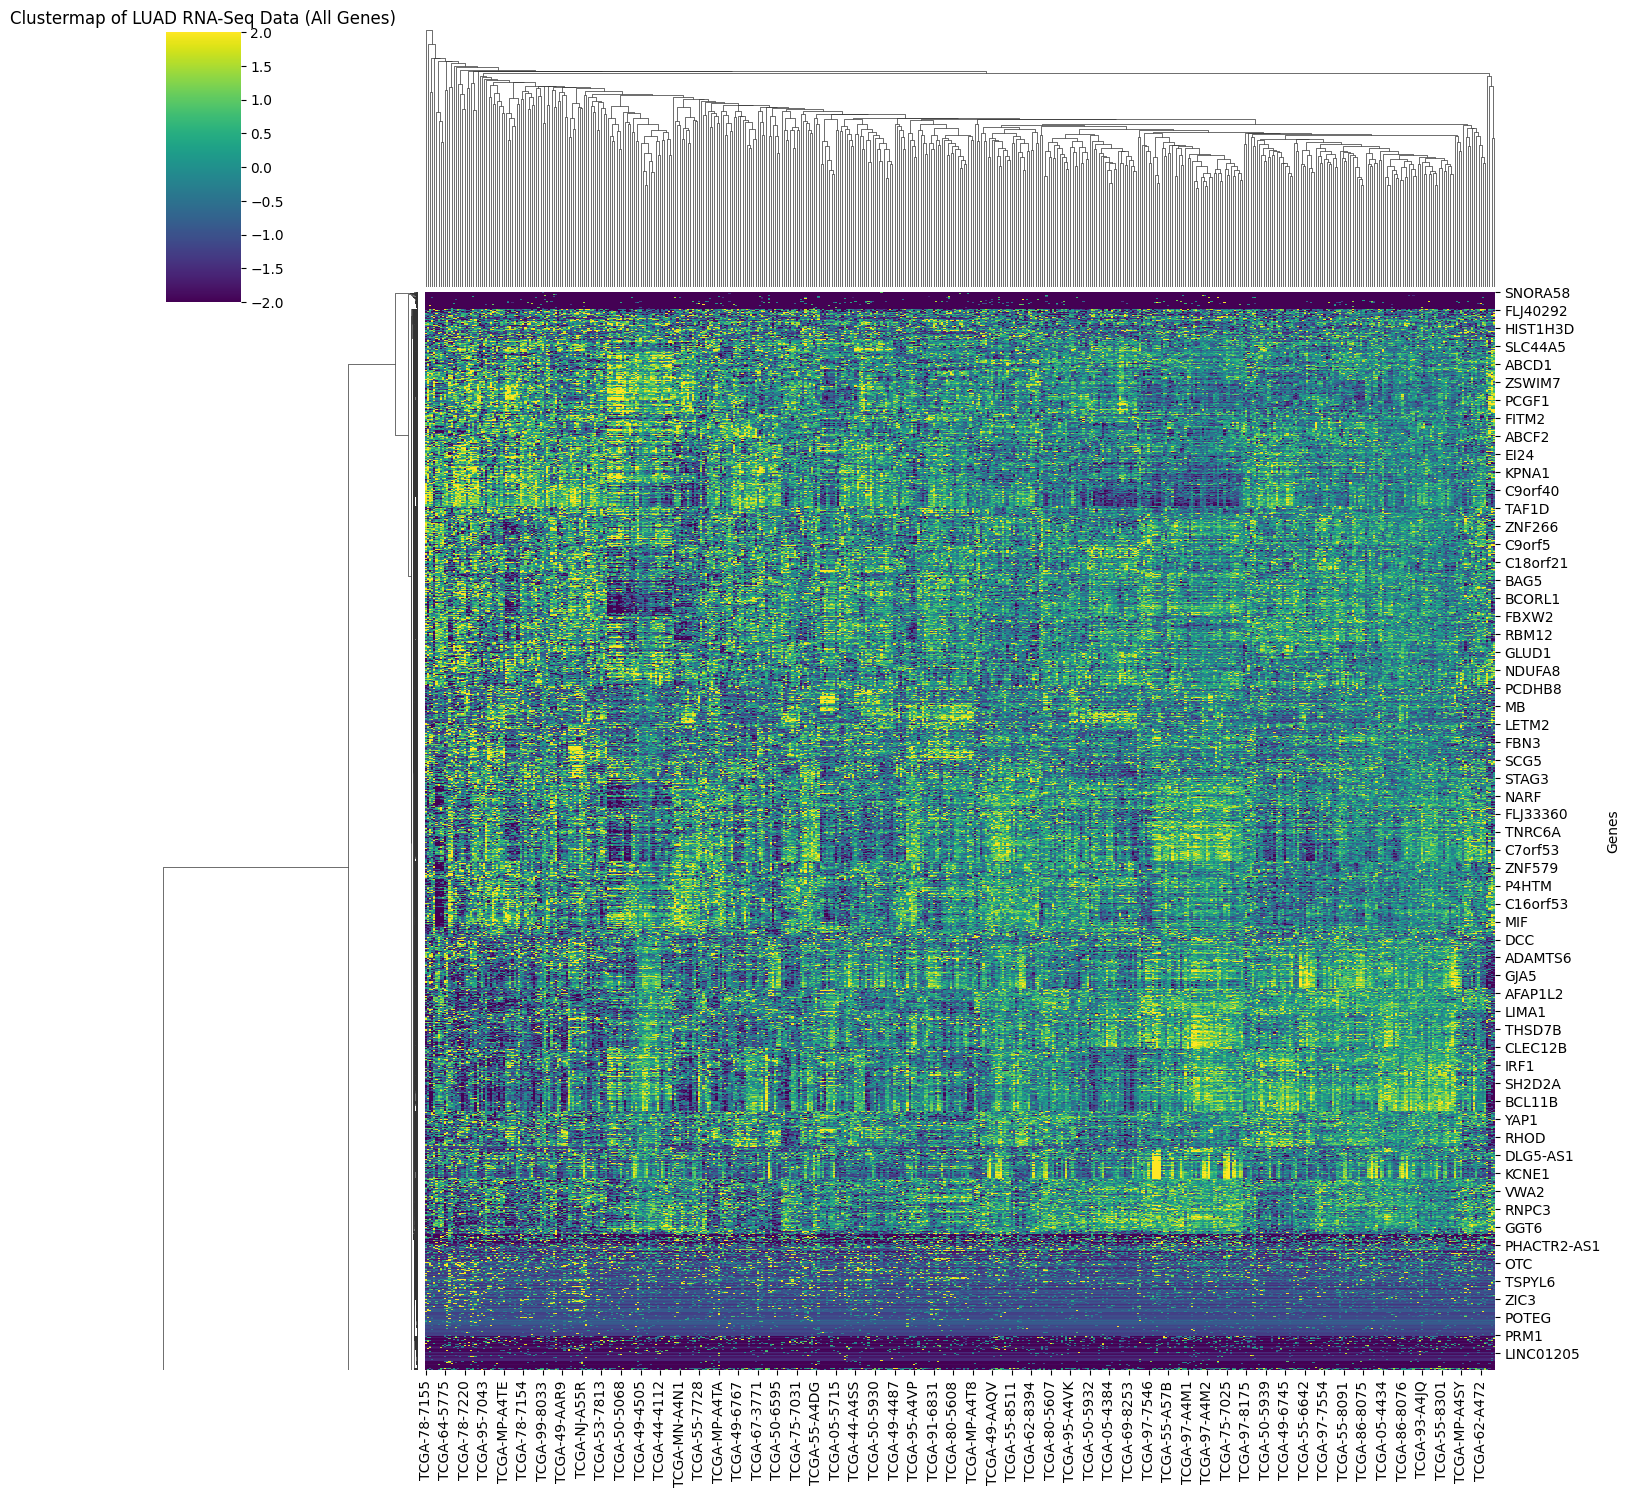

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select subset of genes for visualization
genes_of_interest = ['EGFR', 'KRAS', 'MYC', 'CCND1', 'VEGFA']
genes_of_interest_df = df_LUAD_RNAseq.loc[genes_of_interest]

# Calculate the Mean and Standard Deviation of the gene expression. Display Histogram of the gene data
for gene in genes_of_interest:
  mean = genes_of_interest_df.loc[gene].mean()
  std = genes_of_interest_df.loc[gene].std()
  print(f"Mean of {gene}: {mean}")
  print(f"Standard Deviation of {gene}: {std}")
  print('')

for gene in genes_of_interest:
  plt.figure(figsize=(8,6))
  sns.histplot(genes_of_interest_df.loc[gene].iloc[1:], bins=20, kde=False)
  plt.title(f'Gene Expression Histogram of {gene} ')
  plt.xlabel('Gene Expression Level')
  plt.ylabel('Frequency')
  plt.show()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(genes_of_interest_df.iloc[:,1:], cmap="viridis", vmin=-2, vmax=2) # Use transpose to have genes on x-axis and samples on y-axis
plt.title("Heatmap of LUAD RNA-Seq Data")
plt.xlabel("Patients") # change x label
plt.ylabel("Genes") # change y label
plt.show()

#Create a clustermap
sns.clustermap(genes_of_interest_df.iloc[:,1:], cmap="viridis", vmin=-2, vmax=2)
plt.title("Clustermap of LUAD RNA-Seq Data")
plt.show()

# Create clustermap for all genes
sns.clustermap(df_LUAD_RNAseq.iloc[:, :], cmap="viridis", vmin=-2, vmax=2, figsize=(15, 15))
plt.title("Clustermap of LUAD RNA-Seq Data (All Genes)")
plt.show()

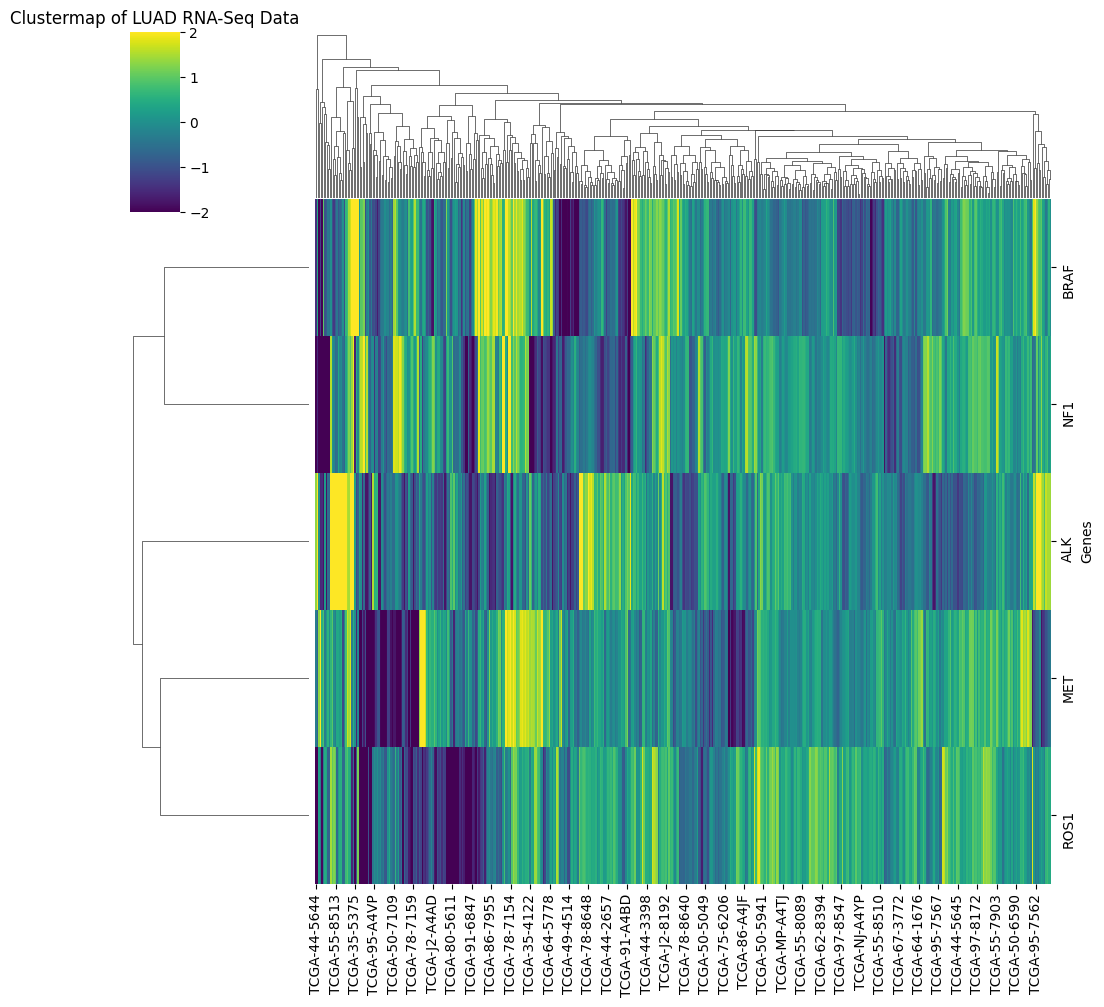

In [3]:
# select other genes of interest and re-run the clustermap
genes_of_interest = ['ALK', 'BRAF', 'MET', 'ROS1', 'NF1']
genes_of_interest_df = df_LUAD_RNAseq.loc[genes_of_interest]

sns.clustermap(genes_of_interest_df.iloc[:,1:], cmap="viridis", vmin=-2, vmax=2)
plt.title("Clustermap of LUAD RNA-Seq Data")
plt.show()


# Exploratory Analysis (Overall Survival)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=cdd8a6a7cf8f3e8149ab6f62c2f64c00c26f2342c0adb11a92159949fc1e55c5
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


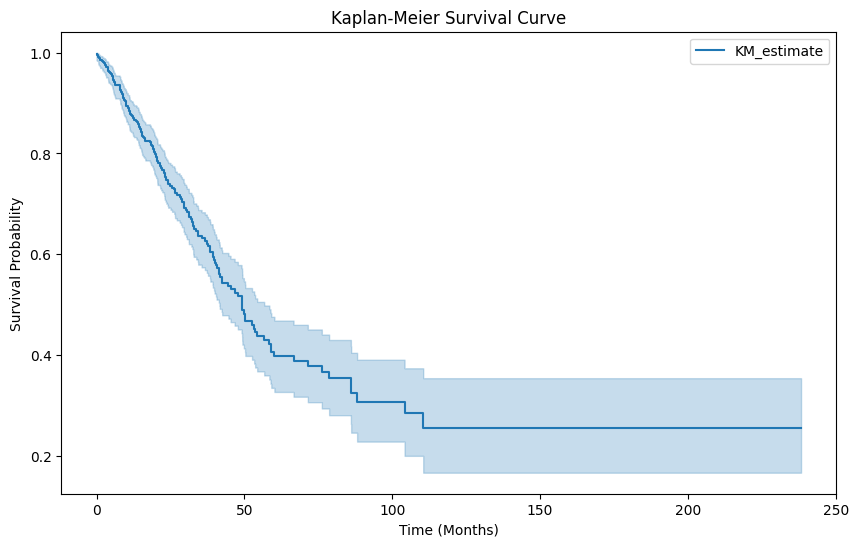

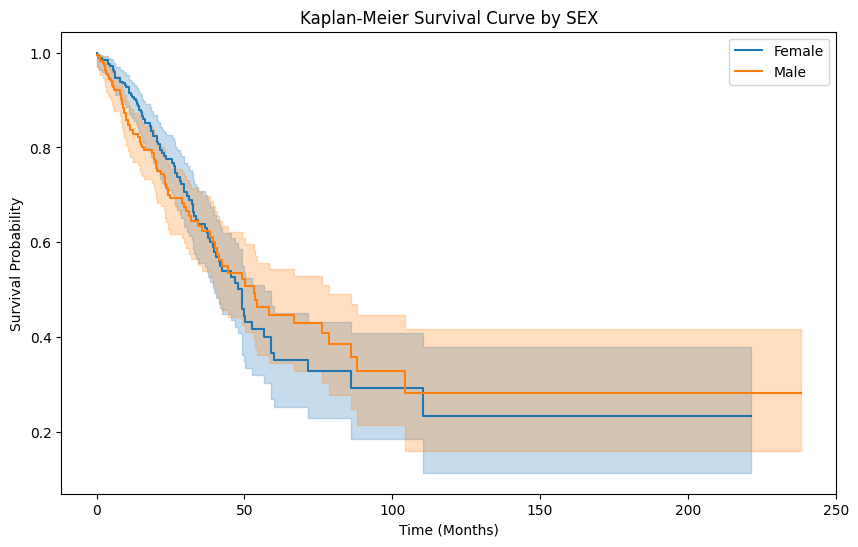

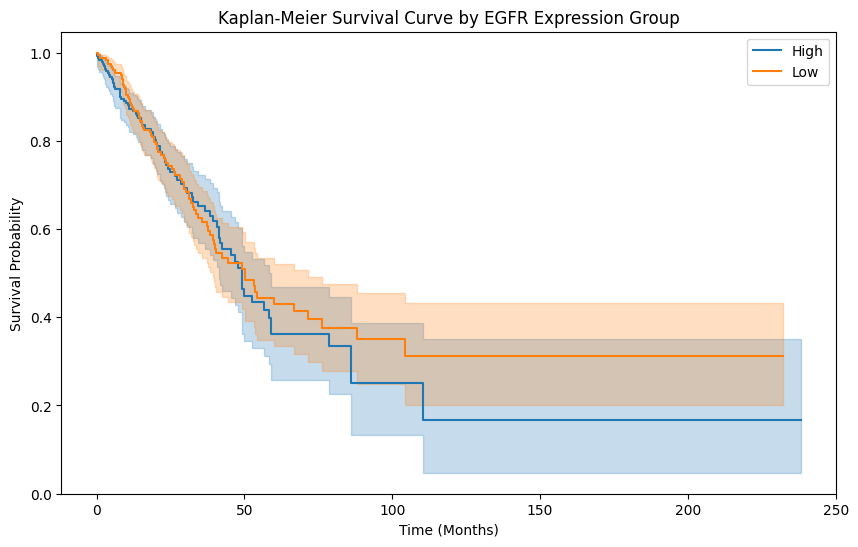

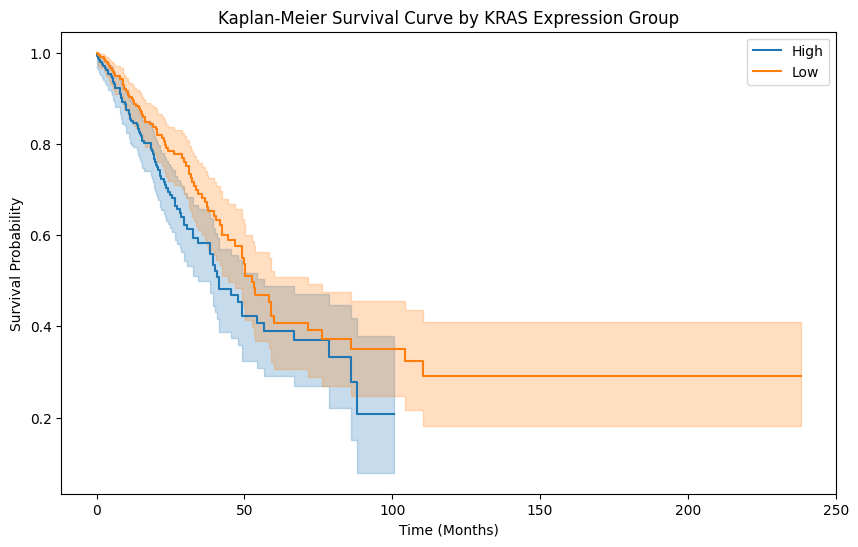

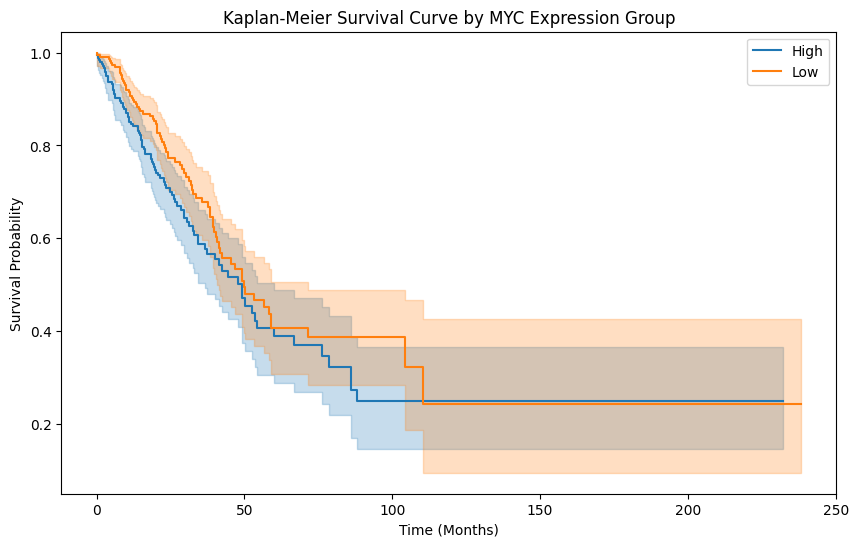

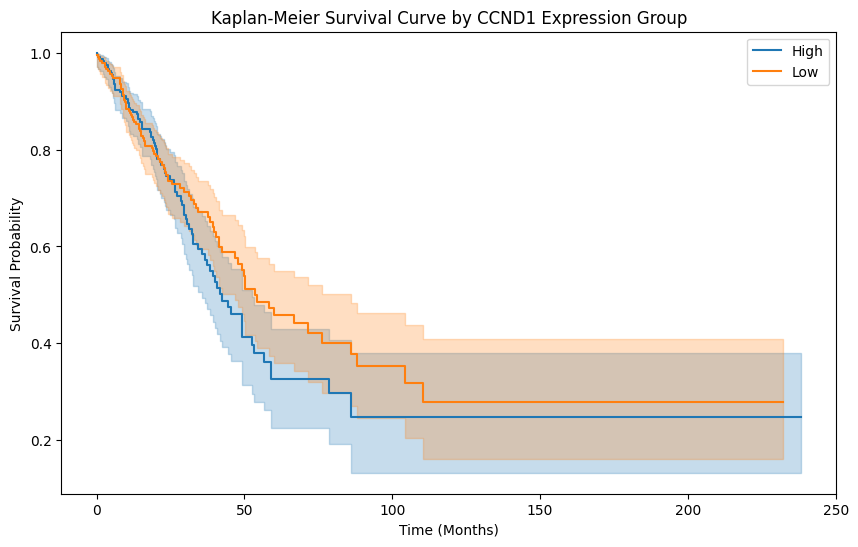

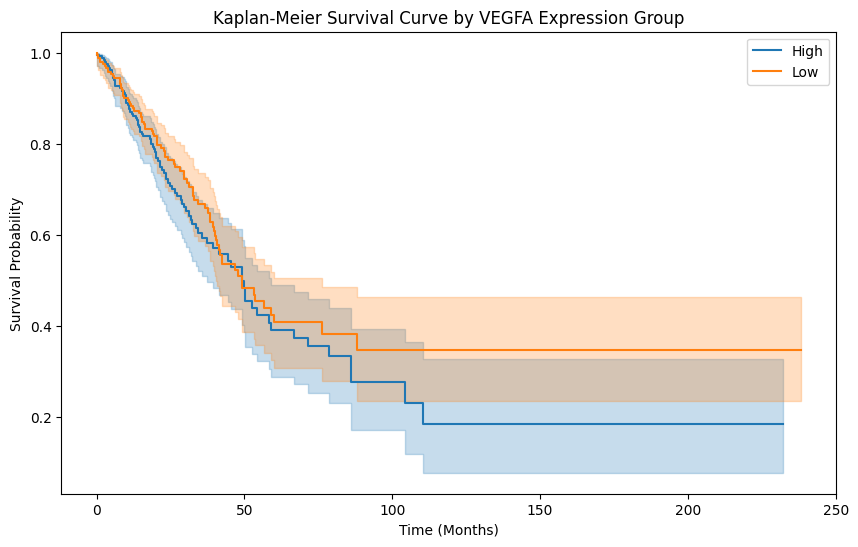

In [4]:
!pip install lifelines
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Drop NaN values
df_LUAD_clinical_data = df_LUAD_clinical_data.dropna(subset=['OS_MONTHS','OS_STATUS'])

# Assuming 'OS_MONTHS' is overall survival time and 'OS_STATUS' is the event indicator (1=dead, 0=alive)
# Adjust column names if necessary
T = df_LUAD_clinical_data['OS_MONTHS']
E = df_LUAD_clinical_data['OS_STATUS']

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator
kmf.fit(T, event_observed=E)

# Plot the Kaplan-Meier curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()


# Example of Kaplan-Meier analysis by a categorical variable (e.g., 'SEX')
if 'SEX' in df_LUAD_clinical_data.columns:

    groups = df_LUAD_clinical_data['SEX'].unique()
    plt.figure(figsize=(10, 6))

    for group in groups:
        ix = df_LUAD_clinical_data['SEX'] == group
        kmf.fit(T[ix], E[ix], label=group) # Fits the model for the current group
        kmf.plot()

    plt.title('Kaplan-Meier Survival Curve by SEX')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

else:
    print("Column 'SEX' not found in the dataframe.")


genes_of_interest = ['EGFR', 'KRAS', 'MYC', 'CCND1', 'VEGFA']
for gene in genes_of_interest:
  if gene in df_LUAD_RNAseq.index:
    df_LUAD_RNAseq = df_LUAD_RNAseq.reset_index().set_index('Genes')
    #print(df_LUAD_RNAseq)
    df_LUAD_clinical_data = df_LUAD_clinical_data.reset_index().set_index('PATIENT_ID')
    #print(df_LUAD_clinical_data)
    gene_expression = df_LUAD_RNAseq.loc[gene, df_LUAD_clinical_data.index]
    #print(gene_expression)
    median_expression = gene_expression.median()

    df_LUAD_clinical_data['Expression_group'] = gene_expression >= median_expression

    T = df_LUAD_clinical_data['OS_MONTHS']
    E = df_LUAD_clinical_data['OS_STATUS']

    kmf = KaplanMeierFitter()
    plt.figure(figsize=(10, 6))

    for group,label in [(True, "High"), (False, "Low")]:
      ix = df_LUAD_clinical_data['Expression_group'] == group
      kmf.fit(T[ix], E[ix], label=label)
      kmf.plot()

    plt.title(f'Kaplan-Meier Survival Curve by {gene} Expression Group')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.show()

  else:
      print(f"Gene {gene} not found in the dataframe.")

Exploratory Analysis - Extra

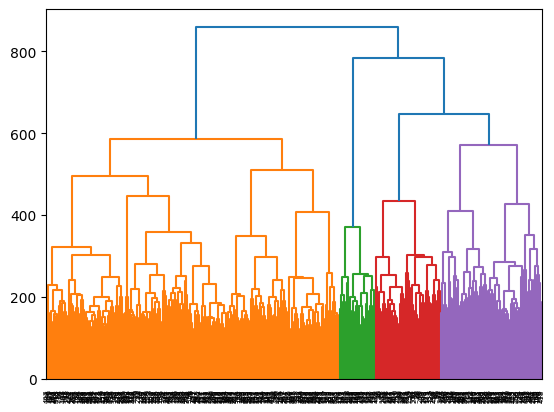

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select genes for clustering
genes_for_clustering = df_LUAD_RNAseq.index  # Use all genes or specify a subset

# Scale the data
scaler = StandardScaler()
# Transpose for patients as rows, and select only the patients in the clinical data
scaled_data = scaler.fit_transform(df_LUAD_RNAseq.loc[genes_for_clustering, df_LUAD_clinical_data.index].T)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the optimal number of clusters
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to clinical data
df_LUAD_clinical_data['Cluster'] = clusters # Now clusters and df_LUAD_clinical_data should have the same length

# Hierarchical clustering (example)
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.show()

# PCA for dimensionality reduction (example)
pca = PCA(n_components=50)  # Choose the number of components
pca_data = pca.fit_transform(scaled_data)